<a href="https://colab.research.google.com/github/manu675/Data_Mining_Cup_Prudsys_21/blob/master/eda_feature_engineering_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Mining Cup Prudsys 2021**


# Background on Potential Models

Task: https://www.data-mining-cup.com/dmc-2021/?utm_source=dmc&utm_medium=email&utm_campaign=newsletter

**Starting points:**  
*General Overview*:     
https://towardsdatascience.com/the-remarkable-world-of-recommender-systems-bff4b9cbe6a7

*More details and potential libraries:*  
https://towardsdatascience.com/recommendation-systems-in-the-real-world-51e3948772f3


*Resources:*  
*   https://machinelearningmastery.com/recommender-systems-resources/
*   https://medium.com/@chaitanyarb619/recommendation-systems-a-walk-trough-33587fecc195


*TFIDF:*  
https://heartbeat.fritz.ai/recommender-systems-with-python-part-i-content-based-filtering-5df4940bd831

*Recommender + Countvectorizer:*   
https://www.kdnuggets.com/2019/11/content-based-recommender-using-natural-language-processing-nlp.html

*Content-based recommender:*  
*  https://towardsdatascience.com/building-a-content-based-recommender-system-for-hotels-in-seattle-d724f0a32070

*  https://www.kdnuggets.com/2020/07/building-content-based-book-recommendation-engine.html

*  https://medium.com/analytics-vidhya/recommendation-system-content-based-part-1-8f5ac093127a

*Building a recommender in Keras:*

https://heartbeat.fritz.ai/build-train-and-deploy-a-book-recommender-system-using-keras-tensorflow-js-b96944b936a7

*K means based recommender:*

https://asdkazmi.medium.com/ai-movies-recommendation-system-with-clustering-based-k-means-algorithm-f04467e02fcd

*Top-N recommender and hit rate evaluation:*

https://towardsdatascience.com/evaluating-a-real-life-recommender-system-error-based-and-ranking-based-84708e3285b

*Bayesian personalized ranking:*  
https://towardsdatascience.com/recommender-system-using-bayesian-personalized-ranking-d30e98bba0b9

*Alternating Least Squares (ALS) for implict data:*  
https://medium.com/radon-dev/als-implicit-collaborative-filtering-5ed653ba39fe

https://jessesw.com/Rec-System/

*Implict library for Recommender systems:*
https://implicit.readthedocs.io/en/latest/ann.html

*Deep Neural Network based recommendation systems:*  
https://towardsdatascience.com/introduction-to-recommender-systems-2-deep-neural-network-based-recommendation-systems-4e4484e64746

**Goal**: content-based Top-N recommender system (item-item recommendations based on item attributes such as same author, similar title, same topic/subtopic)

**Potential models**:
- Matrix Factorization (Alternating Least Squares; Logistic Matrix Factorization)
- Clustering (KNN)
- Bayesian Personalized Ranking
- Deep Learning (NNs) ?


**Potential evaluation/comparison metrics for recommender systems:**  
https://towardsdatascience.com/evaluation-metrics-for-recommender-systems-df56c6611093

*Measuring similarity in Recommender systems:*  
https://levelup.gitconnected.com/measuring-similarity-in-recommendation-systems-8f2aa8ad1f44

Levenshtein distance:  
https://github.com/ztane/python-Levenshtein

https://towardsdatascience.com/calculating-string-similarity-in-python-276e18a7d33a

*Recommender evaluation library:*  
https://github.com/statisticianinstilettos/recmetrics

*Evaluation metrics for Rating Prediction Recommenders (predict user ratings by taking explicit feedback data from users in the form of ratings between 0 and 10):* RMSE, MAE

*Top-N recommender (return a ranked list of N items users will potentially be interested in based on ):* Hit rate (find all items in a user's history in the training data and remove one of these items; then run a Leave one out CV and get the top-N recommendations - if the removed item is one of the top-N it's a hit)

Precision: popular evaluation metric for recommender systems. It simply looks at the top K recommendations and calculate what proportion of those recommendations are actually relevant to the user. k: total # of recommendations, n_relevant: recommendations relevant to the user

$$ precision_k = n_{relevant}/k $$

Recall: the proportion of items that were found in the top K recommendations.


**ToDo's for the presentation:**  

Summary about task and data   
Challenges (Data Modeling)  
Subproblems and responsibilities within the team  
First EDA insights: # of features, summary stats, plots  


Implementation Tutorial:  
https://medium.datadriveninvestor.com/how-to-build-a-recommendation-system-for-purchase-data-step-by-step-d6d7a78800b6

Installing libraries

In [ ]:
##pip install rake_nltk

  Created wheel for rake-nltk: filename=rake_nltk-1.0.4-py2.py3-none-any.whl size=7819 sha256=a2583900f1e5bec436240d0d2844414501693a37edfd781490de5886bcd3e4c8
  Stored in directory: /root/.cache/pip/wheels/ef/92/fc/271b3709e71a96ffe934b27818946b795ac6b9b8ff8682483f
Successfully built rake-nltk


In [1]:
pip install textdistance

In [2]:
pip install python-Levenshtein

In [ ]:
##pip install chart_studio

# Importing libraries

In [3]:
# importing libaries:

# basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Hyperparameter tuning libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from scipy.stats import loguniform, randint, uniform

# specific libraries
import nltk # natural language toolkit
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import textdistance # Jaro-Winkler string distance
import Levenshtein # distance measure for strings
##from sklearn.metrics.pairwise import linear_kernel 
##from rake_nltk import Rake # Rapid automatic keyword extraction (RAKE)




# Reading in the data

In [4]:
## Way 2: uploading the local data to google colab
# importing local data to google colab:
from google.colab import files
uploaded = files.upload()

Saving evaluation.csv to evaluation (1).csv


In [4]:
## Way 2: uploading the local data to google colab
# importing local data to google colab:
from google.colab import files
uploaded = files.upload()

Saving items.csv to items (2).csv


In [6]:
## Way 2: uploading the local data to google colab
# importing local data to google colab:
from google.colab import files
uploaded = files.upload()

Saving transactions.csv to transactions (1).csv


# Exploratory Data Analysis


https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15

Reading in the provided csv data files

In [7]:
eval_df = pd.read_csv("evaluation.csv", sep =";")

In [5]:
items_df = pd.read_csv("items.csv", sep ="|")

In [9]:
transactions_df = pd.read_csv("transactions.csv", sep ="|")

In [ ]:
eval_df.head()

,itemID
0,12
1,45274
2,10104
3,41371
4,14015


In [ ]:
eval_df.shape

(1000, 1)

In [ ]:
items_df.head()

,itemID,title,author,publisher,main topic,subtopics
0,21310,Princess Poppy: The Big Mix Up,Janey Louise Jones,Penguin Random House Children's UK,YFB,[5AH]
1,73018,Einfach zeichnen! Step by Step,Wiebke Krabbe,Schwager und Steinlein,AGZ,"[5AJ,AGZ,WFA,YBG,YBL,YNA,YPA]"
2,19194,Red Queen 1,Victoria Aveyard,Orion Publishing Group,YFH,"[5AP,FBA]"
3,40250,Meine Kindergarten-Freunde (Pirat),NaN,Ars Edition GmbH,YB,"[5AC,5AD,YBG,YBL,YF]"
4,46107,Mein großes Schablonen-Buch - Wilde Tiere,Elizabeth Golding,Edition Michael Fischer,WFTM,"[WD,WFTM,YBG,YBL,YBLD,YBLN1]"


In [ ]:
items_df.shape

(78030, 6)

**Levenshtein Distance**: The distance value describes the minimal number of deletions, insertions, or substitutions that are required to transform one string (the source) into another (the target). The Levenshtein Distance also works on strings of unequal length

https://stackabuse.com/levenshtein-distance-and-text-similarity-in-python/

In [ ]:
# testing levenshtein distance metric on main topic
print(items_df["main topic"][0], items_df["main topic"][2])

YFB YFH


In [ ]:
Levenshtein.distance(items_df["main topic"][0],items_df["main topic"][2])

1

In [ ]:
# test 2 levenshtein distance 
print(items_df["main topic"][0], items_df["main topic"][3])

YFB YB


In [ ]:
Levenshtein.distance(items_df["main topic"][0],items_df["main topic"][3])

1

**Jaro-Winkler string distance**  

The Jaro algorithm is a measure of characters in common, being no more than half the length of the longer string in distance, with consideration for transpositions. Winkler modified this algorithm to support the idea that differences near the start of the string are more significant than differences near the end of the string. Jaro and Jaro-Winkler are suited for comparing smaller strings like words and names.

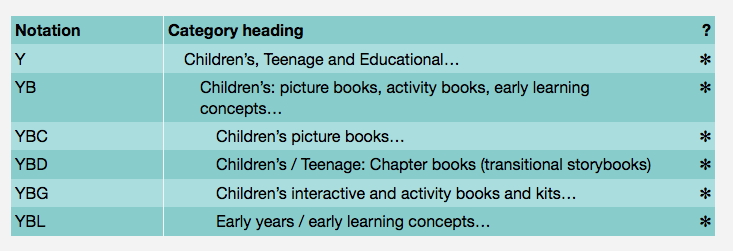

In [ ]:
# Jaro winkler distance; prefix weight of 0.5
Levenshtein.jaro_winkler("Y","YB", 0.5)

0.9166666666666667

In [ ]:
Levenshtein.jaro_winkler("Y","YBC", 0.5)

0.8888888888888888

In [ ]:
Levenshtein.jaro_winkler("YB","YBC", 0.5)

1.0

In [ ]:
Levenshtein.jaro_winkler("Y","Q", 0.5)

0.0

In [ ]:
Levenshtein.jaro_winkler("ABC","YBC", 0.5)

0.7777777777777777

loop attempt 1

```
import pandas
import Levenshtein

df1 = pandas.DataFrame({"text": ["hello world", "world hello"], "id": [11, 31]})
df2 = pandas.DataFrame({"test": ["hello", "world", "hello word"], "id": [13, 11, 12]})

# Create all possible combinations by joining the dataframes on a fictional key
df1["key"] = 0
df2["key"] = 0
df = df1.merge(df2, on="key").drop(columns=["key"])

# Calculate the distances for all possible combinations
df["distance"] = df.apply(lambda row: Levenshtein.ratio(str(row["text"]), str(row["test"])), axis=1)

# Use the distances as a filter
df1.loc[df1["id"].isin(df.loc[df["distance"] < 0.9, "id_x"])]

```



In [ ]:
# number of unique main topic codes
items_df["main topic"].nunique()

699

In [ ]:
##items_df["main topic"].unique()

In [ ]:
df1 = pd.DataFrame(items_df["main topic"].unique())
df2 = pd.DataFrame(items_df["main topic"].unique())
 
# Create all possible combinations by joining the dataframes on a fictional key
df1["key"] = 0
df2["key"] = 0
df = df1.merge(df2, on="key").drop(columns=["key"])
 
df

,0_x,0_y
0,YFB,YFB
1,YFB,AGZ
2,YFB,YFH
3,YFB,YB
4,YFB,WFTM
...,...,...
489995,YBD,YPAD
489996,YBD,WNCF
489997,YBD,TJFM1
489998,YBD,JPFF


In [ ]:
# Calculate the distances for all possible combinations
df["distance"] = df.apply(lambda row: Levenshtein.jaro_winkler(str(row["0_x"]), str(row["0_y"]),0.4), axis=1)
 
# Use the distances as a filter
##df1.loc[df1["id"].isin(df.loc[df["distance"] >= 0.8, "id_x"])]


In [ ]:
df.head(n=20)

,0_x,0_y,distance
0,YFB,YFB,1.000000
1,YFB,AGZ,0.000000
2,YFB,YFH,0.955556
3,YFB,YB,0.933333
4,YFB,WFTM,0.527778
5,YFB,FMR,0.555556
6,YFB,YBG,0.866667
7,YFB,YFE,0.955556
8,YFB,YZG,0.733333
9,YFB,FMB,0.777778


Custom Approach

https://medium.com/@d_dchris/10-methods-to-solve-the-longest-common-prefix-problem-using-python-leetcode-14-a87bb3eb0f3a


In [ ]:
# dataframe to represent all main topic code combinations
df1 = pd.DataFrame(items_df["main topic"].unique())
df2 = pd.DataFrame(items_df["main topic"].unique())
 
# Create all possible combinations by joining the dataframes on a fictional key
df1["key"] = 0
df2["key"] = 0
df = df1.merge(df2, on="key").drop(columns=["key"])
 
df

In [ ]:
# custom longest common prefix function
def longestCommonPrefix(strs):
    longest_pre = ""
    if not strs: 
      return longest_pre
    shortest_str = min(strs, key=len)
    for i in range(len(shortest_str)):
        if all([x.startswith(shortest_str[:i+1]) for x in strs]):
            longest_pre = shortest_str[:i+1]
        else:
            break
    return longest_pre

In [ ]:
# Calculate length of the common prefixes for all possible combinations of main topic codes
df["longest_common_prefix"] = df.apply(lambda row: len(longestCommonPrefix([str(row["0_x"]), str(row["0_y"])])), axis=1)
 
    # Use the distances as a filter
##df1.loc[df1["id"].isin(df.loc[df["distance"] >= 0.8, "id_x"])]

In [ ]:
df

,0_x,0_y,longest_common_prefix
0,YFB,YFB,3
1,YFB,AGZ,0
2,YFB,YFH,2
3,YFB,YB,1
4,YFB,WFTM,0
...,...,...,...
489995,YBD,YPAD,1
489996,YBD,WNCF,0
489997,YBD,TJFM1,0
489998,YBD,JPFF,0


In [ ]:
len(items_df)

78030

End custom approach

In [ ]:
transactions_df.head()

,sessionID,itemID,click,basket,order
0,0,21310,1,0,0
1,1,73018,1,0,0
2,2,19194,1,0,0
3,3,40250,1,0,0
4,4,46107,1,0,0


In [ ]:
transactions_df["sessionID"].value_counts()

29304     213
95250     157
7394      144
218629    141
15327     129
         ... 
234710      1
232661      1
230612      1
244947      1
0           1
Name: sessionID, Length: 271983, dtype: int64

In [ ]:
transactions_df["click"].value_counts()

1      288473
2       29033
0       23548
3       12028
4        4841
5        2925
6        1535
7        1086
8         598
9         384
10        235
11        152
12         89
13         68
14         46
16         28
15         21
17         16
18         10
21          6
22          5
20          4
19          3
97          1
23          1
24          1
25          1
28          1
32          1
34          1
36          1
118         1
Name: click, dtype: int64

In [ ]:
transactions_df["order"].value_counts()

0     348237
1      16593
2        255
3         18
4          7
5          7
21         4
10         2
25         2
7          2
27         2
12         2
11         2
6          1
28         1
14         1
15         1
19         1
20         1
22         1
23         1
26         1
13         1
Name: order, dtype: int64

In [ ]:
# itemIDs for which orders where >0 and basket was >0
transactions_df.loc[(transactions_df["order"]>0) & (transactions_df["basket"]>0), "itemID" ]

66        10666
115       38931
154       53473
269        9196
590        2408
          ...  
364830     1342
364883     3837
364945    43441
364983    71270
365038    67753
Name: itemID, Length: 4527, dtype: int64

In [ ]:
# itemIDs for which clicks where >0 and orders were >0 and basket was >0
transactions_df.loc[(transactions_df["order"]>0) & (transactions_df["click"]>0) & (transactions_df["basket"]>0), "itemID" ]

66        10666
115       38931
154       53473
269        9196
590        2408
          ...  
364830     1342
364883     3837
364945    43441
364983    71270
365038    67753
Name: itemID, Length: 3692, dtype: int64

In [ ]:
# itemIDs for which clicks where >0 and orders were >0
transactions_df.loc[(transactions_df["order"]>0) & (transactions_df["click"]>0), "itemID" ]

66        10666
115       38931
154       53473
269        9196
590        2408
          ...  
364830     1342
364883     3837
364945    43441
364983    71270
365038    67753
Name: itemID, Length: 3772, dtype: int64

TODO: check which evaluation ids are included in those 3772 itemIDs

In [ ]:
list_click_order_ids = transactions_df.loc[(transactions_df["order"]>0) & (transactions_df["click"]>0), "itemID" ].to_list()

In [ ]:
list_eval_ids = eval_df["itemID"].to_list()

In [ ]:
# subsetting the click and order itemIDs that appear in the evaluation dataframe through taking the list intersection
len(list(set(list_click_order).intersection(set(list_eval_ids))))

30

In [ ]:
list(set(list_click_order).intersection(set(list_eval_ids)))

[66177,
 17665,
 62732,
 38543,
 2579,
 58262,
 8728,
 61593,
 1177,
 74398,
 39201,
 42531,
 28844,
 35638,
 31548,
 25663,
 72523,
 52305,
 49234,
 74196,
 15581,
 3166,
 29536,
 38368,
 14314,
 14318,
 43762,
 5362,
 40692,
 58236]

In [ ]:
transactions_df.shape

(365143, 5)

In [ ]:
# joining the items_df and the transactions_df
df_combined = pd.merge(items_df, transactions_df, on="itemID")

df_combined.head()
                       
                     

,itemID,title,author,publisher,main topic,subtopics,sessionID,click,basket,order
0,21310,Princess Poppy: The Big Mix Up,Janey Louise Jones,Penguin Random House Children's UK,YFB,[5AH],0,1,0,0
1,21310,Princess Poppy: The Big Mix Up,Janey Louise Jones,Penguin Random House Children's UK,YFB,[5AH],89272,1,0,0
2,21310,Princess Poppy: The Big Mix Up,Janey Louise Jones,Penguin Random House Children's UK,YFB,[5AH],183856,1,0,0
3,73018,Einfach zeichnen! Step by Step,Wiebke Krabbe,Schwager und Steinlein,AGZ,"[5AJ,AGZ,WFA,YBG,YBL,YNA,YPA]",1,1,0,0
4,73018,Einfach zeichnen! Step by Step,Wiebke Krabbe,Schwager und Steinlein,AGZ,"[5AJ,AGZ,WFA,YBG,YBL,YNA,YPA]",771,1,0,0


In [ ]:
df_combined.shape

(365143, 10)

In [ ]:
# column with itemIDs for which clicks where >0 and orders were >0
df_combined["click_plus_order"] = df_combined.loc[(df_combined["order"]>0) & (df_combined["click"]>0), "itemID" ]

In [ ]:
df_combined["click_plus_order"].value_counts()

47120.0    78
69803.0    44
55699.0    41
13711.0    35
55215.0    32
           ..
48939.0     1
48969.0     1
12243.0     1
24506.0     1
65542.0     1
Name: click_plus_order, Length: 1786, dtype: int64

# Data Insights

In [ ]:
# dimensions and No. of features
df_combined.shape

(365143, 10)

In [ ]:
df_combined.columns

Index(['itemID', 'title', 'author', 'publisher', 'main topic', 'subtopics',
       'sessionID', 'click', 'basket', 'order'],
      dtype='object')

In [ ]:
# data types (5 integer variables)
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365143 entries, 0 to 365142
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   itemID      365143 non-null  int64 
 1   title       365143 non-null  object
 2   author      323809 non-null  object
 3   publisher   365142 non-null  object
 4   main topic  364248 non-null  object
 5   subtopics   365143 non-null  object
 6   sessionID   365143 non-null  int64 
 7   click       365143 non-null  int64 
 8   basket      365143 non-null  int64 
 9   order       365143 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 30.6+ MB


In [ ]:
df_combined["basket"].unique()

array([  0,   1,   2,   3,   4,   7,  10,  23,   6,  20,   5,  51,  43,
        36, 119,   9,   8,  25,  14, 287, 268,  18,  38,  26,  11,  30,
        24,  98,  52,  65,  15,  28, 182,  21,  80, 293,  58, 100,  22,
        12,  13,  29,  16,  48, 150])

In [ ]:
df_combined["basket"].unique()


array([  0,   1,   2,   3,   4,   7,  10,  23,   6,  20,   5,  51,  43,
        36, 119,   9,   8,  25,  14, 287, 268,  18,  38,  26,  11,  30,
        24,  98,  52,  65,  15,  28, 182,  21,  80, 293,  58, 100,  22,
        12,  13,  29,  16,  48, 150])

In [ ]:
df_combined["order"].unique()

array([ 0,  1,  2,  3,  4,  7, 10,  5, 27, 25, 26, 21, 12, 11, 15, 22, 23,
       14, 28,  6, 13, 20, 19])

In [ ]:
# summary stats (for integer variables)
df_combined.describe()

,itemID,sessionID,click,basket,order
count,365143.000000,365143.000000,365143.000000,365143.000000,365143.000000
mean,40051.292307,139586.939175,1.233180,0.141202,0.048403
std,22493.347334,80795.207871,1.069996,1.107574,0.268717
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,20713.000000,69459.500000,1.000000,0.000000,0.000000
50%,40692.000000,139608.000000,1.000000,0.000000,0.000000
75%,58916.000000,209750.500000,1.000000,0.000000,0.000000
max,79066.000000,279354.000000,118.000000,293.000000,28.000000


In [ ]:
# detecting and counting missing values 
df_combined.isnull().sum() # number of NaNs per column

itemID            0
title             0
author        41334
publisher         1
main topic      895
subtopics         0
sessionID         0
click             0
basket            0
order             0
dtype: int64

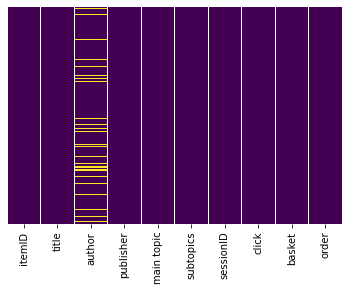

In [ ]:
# visualization of missing values
sns.heatmap(df_combined.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

In [ ]:
# list of categorical features
cat_feature_mask = df_combined.dtypes == object # boolean test (mask) of whether the col is of "object type" or not
cat_feature_mask

itemID        False
title          True
author         True
publisher      True
main topic     True
subtopics      True
sessionID     False
click         False
basket        False
order         False
dtype: bool

In [ ]:
# filter categorical columns using the mask and turn it into a list
cat_list = df_combined.columns[cat_feature_mask].to_list()

cat_list

['title', 'author', 'publisher', 'main topic', 'subtopics']

In [ ]:
# list of numerical features
num_feature_mask = df_combined.dtypes != object # boolean test of whether the col is not of the type object 
num_feature_mask

itemID         True
title         False
author        False
publisher     False
main topic    False
subtopics     False
sessionID      True
click          True
basket         True
order          True
dtype: bool

In [ ]:
# filter categorical columns using the mask and turn it into a list
num_list = df_combined.columns[num_feature_mask].to_list()

num_list

['itemID', 'sessionID', 'click', 'basket', 'order']

In [ ]:
df_combined[["author","title"]].value_counts()

author                    title                                                                                   
Joanne K. Rowling         Harry Potter Box Set: The Complete Collection (Children's Paperback)                        2291
Ben Aaronovitch           Der Geist in der British Library und andere Geschichten aus dem Folly                       1775
Insight Editions, Panini  Aus den Filmen zu Harry Potter: Eine magische Reise: Alles für deine Fahrt nach Hogwarts    1749
Gecko Keck                Die Kunst des Zeichnens für Kinder                                                          1290
Leigh Bardugo             Goldene Flammen                                                                             1276
                                                                                                                      ... 
Scott Sonneborn           Shell Shocker                                                                                  1
Scott Reintgen          

In [ ]:
df_combined[["publisher", "main topic"]].value_counts()

publisher                  main topic
Usborne Verlag             YBG           6874
Klett-Cotta Verlag         FMB           6709
Ars Edition GmbH           YBG           6703
Bloomsbury UK              YFH           6584
LYX                        FMR           5442
                                         ... 
G & G Verlagsgesellschaft  YBC              1
                           Y                1
Fulton Books               FMW              1
                           FMH              1
.                          FLS              1
Length: 7618, dtype: int64

In [ ]:
df_combined["main topic"].value_counts()

FMB     27851
YFH     24286
YBG     23580
YFHR    16675
FMR     16408
        ...  
YXFS        1
MQR         1
CBVS        1
VSA         1
QRM         1
Name: main topic, Length: 605, dtype: int64

In [ ]:
# correlation matrix (no high positive nor negative cross-correlations)
df_combined.corr()

,itemID,sessionID,click,basket,order
itemID,1.000000,-0.001154,0.003196,-0.004658,0.002651
sessionID,-0.001154,1.000000,-0.001762,-0.001147,0.004193
click,0.003196,-0.001762,1.000000,0.024665,-0.134103
basket,-0.004658,-0.001147,0.024665,1.000000,0.122249
order,0.002651,0.004193,-0.134103,0.122249,1.000000


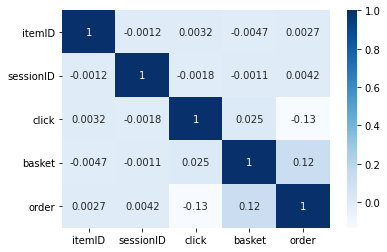

In [ ]:
# visualization of the correlation matrix
# (Dark shades represents positive correlation while lighter shades represents negative correlation.)
plt.figure(figsize=(6,4))
sns.heatmap(df_combined.corr(),cmap='Blues',annot=True) 
# annot=True displays cross correlation values in the matrix cells

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Ver

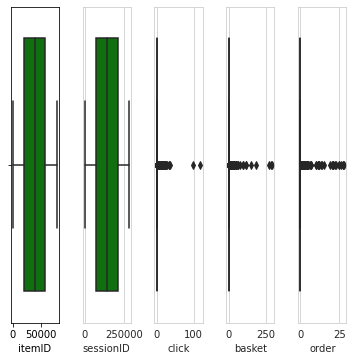

In [ ]:
# checking for outliers (in the numerical variables)
l = df_combined[num_list].columns.values
number_of_columns=12
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df_combined[l[i]],color='green',orient='v')
    plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

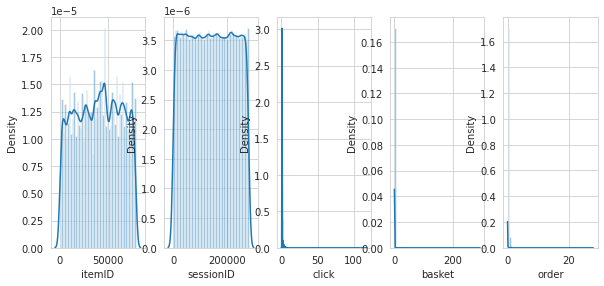

In [ ]:
# checking distribution skewness
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df_combined[l[i]],kde=True) 

# Feature Engineering

https://towardsdatascience.com/building-a-content-based-book-recommendation-engine-9fd4d57a4da

**text feature extraction:** converting text data input into numerical vectors to perform machine learning  

*Bag of words*: converting text data into numerical feature vectors with a fixed size:
- step 1) tokenizing: assign a fixed ID to each word  
- step 2) counting: count the number of occurences of each word  
- step 3) storing: store as a value feature

In [ ]:
# main topic feature
items_df["main topic"]

0         YFB
1         AGZ
2         YFH
3          YB
4        WFTM
         ... 
78025     YFA
78026     FMB
78027     YFU
78028     YFC
78029      FL
Name: main topic, Length: 78030, dtype: object

In [ ]:
items_df["main topic"].value_counts()

FM       6536
YFB      5104
FL       4576
YFH      4149
YFC      3468
         ... 
YNNH5       1
YR          1
CBW         1
WHP         1
QRST        1
Name: main topic, Length: 699, dtype: int64

In [ ]:
# subtopics feature
items_df["subtopics"]

0                                [5AH]
1        [5AJ,AGZ,WFA,YBG,YBL,YNA,YPA]
2                            [5AP,FBA]
3                 [5AC,5AD,YBG,YBL,YF]
4         [WD,WFTM,YBG,YBL,YBLD,YBLN1]
                     ...              
78025                            [YFJ]
78026                               []
78027                               []
78028                        [YFG,YFH]
78029                               []
Name: subtopics, Length: 78030, dtype: object

In [ ]:
items_df["subtopics"].value_counts()

[]                              36904
[YF]                             1425
[FL]                             1076
[YFQ]                             854
[FM]                              841
                                ...  
[5AL,1FPJ,YFH]                      1
[5AN,4CL,YNC]                       1
[5AL,FBA,FM,YFB]                    1
[5AM,FJMS,YFCW,YFT,YFY,3MPB]        1
[5JA,FMR,FMX,FRD]                   1
Name: subtopics, Length: 11381, dtype: int64

In [ ]:
# title feature
items_df["title"].head()

0               Princess Poppy: The Big Mix Up
1               Einfach zeichnen! Step by Step
2                                  Red Queen 1
3           Meine Kindergarten-Freunde (Pirat)
4    Mein großes Schablonen-Buch - Wilde Tiere
Name: title, dtype: object

In [ ]:
items_df["title"].value_counts()

The Secret Garden                    25
Anne of Green Gables                 19
Alice's Adventures in Wonderland     18
The Railway Children                 17
Peter Pan                            16
                                     ..
Drew Is Just Like You!                1
Take Me Back to Oz                    1
Flat Stanley and the Fire Station     1
Die Legende vom Feuermal              1
The Waisting of Time                  1
Name: title, Length: 72128, dtype: int64

In [ ]:
# authors feature
items_df["author"].value_counts()

Garcia Santiago                    1479
Shelley Admont, Kidkiddos Books     228
James Manning                       180
Jules Verne                         178
Idries Shah                         168
                                   ... 
Sharon Lee Wander                     1
Joe Green                             1
C. E Dimond                           1
Paul Schullery                        1
Katharina Wilhelm                     1
Name: author, Length: 35969, dtype: int64

In [ ]:
# getting the top N words in the title feature before removing stop words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]



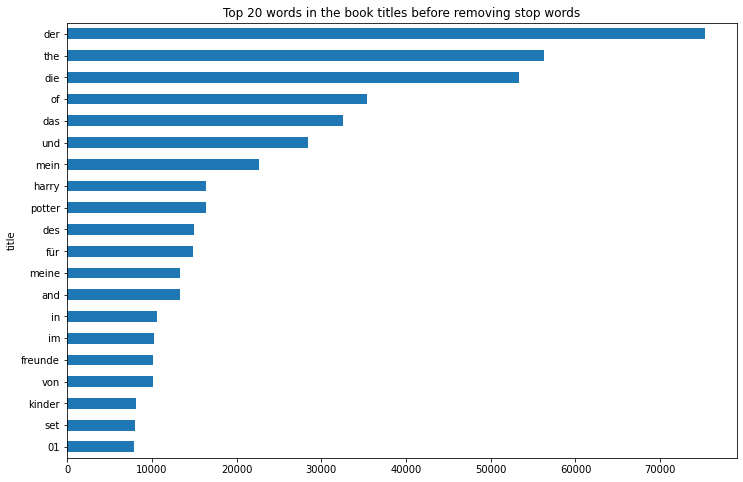

In [ ]:
from plotly.offline import iplot
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='solar')
import plotly.graph_objs as go
import plotly.figure_factory as ff

#import chart_studio.plotly as py
#import plotly.figure_factory as ff

common_words = get_top_n_words(df_combined['title'], n=20)
df1 = pd.DataFrame(common_words, columns = ['title' , 'count'])
df1.groupby('title').sum()['count'].sort_values().plot(kind='barh', 
                                                       #yTitle='Count', 
                                                       #linecolor='black', 
                                                       figsize = (12,8),
                                                       title='Top 20 words in the book titles before removing stop words')



In [ ]:
# top 20 terms in the book title feature before removing stopwords
df1

,title,count
0,der,75261
1,the,56291
2,die,53324
3,of,35393
4,das,32622
5,und,28431
6,mein,22675
7,harry,16425
8,potter,16414
9,des,15008


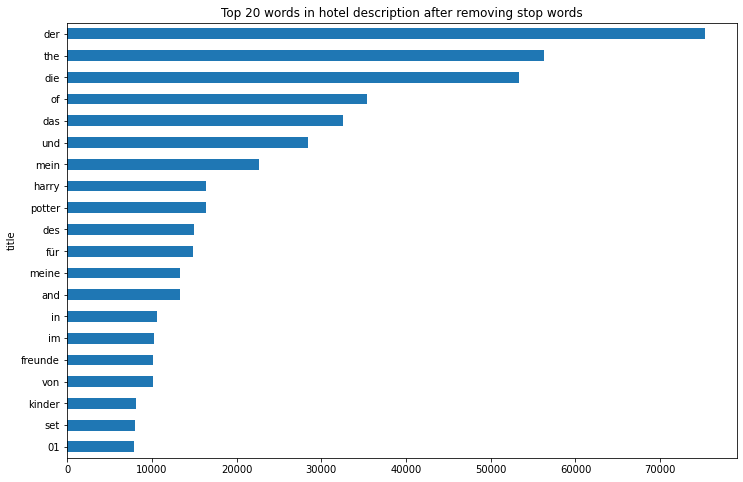

In [ ]:
#import chart_studio.plotly as py # library for the interactive plot method iplot()
#import plotly.graph_objects as go
#import plotly.figure_factory as ff

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words=['english','german']).fit(corpus) # converts text documents into a matrix of token(word) counts; stop_words option is used here 
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(df_combined['title'], 20)
df2 = pd.DataFrame(common_words, columns = ['title' , 'count'])
df2.groupby('title').sum()['count'].sort_values().plot(kind='barh', 
                                                        #yTitle='Count', 
                                                        #linecolor='black', 
                                                        figsize = (12,8),
                                                        title='Top 20 words in book title after removing stop words')



In [ ]:
df2

,title,count
0,der,75261
1,the,56291
2,die,53324
3,of,35393
4,das,32622
5,und,28431
6,mein,22675
7,harry,16425
8,potter,16414
9,des,15008


In [ ]:
# title word counts for the items_df only
items_df['word_count'] = items_df['title'].apply(lambda x: len(str(x).split())) # adding a word_count column to the dataframe
title_lengths = list(items_df['word_count'])
print("Number of descriptions:",len(title_lengths),
      "\nAverage word count", np.average(title_lengths),
      "\nMinimum word count", min(title_lengths),
      "\nMaximum word count", max(title_lengths))

Number of descriptions: 78030 
Average word count 4.816955017301038 
Minimum word count 1 
Maximum word count 2657


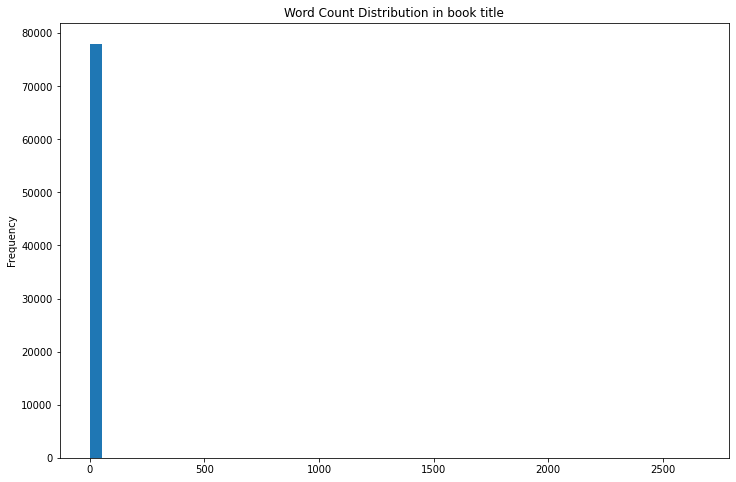

In [ ]:
items_df['word_count'].plot(
    kind='hist',
    bins = 50,
    #linecolor='black',
    #xTitle='word count',
    #yTitle='count',
    figsize = (12,8),
    title='Word Count Distribution in book title')


In [ ]:
items_df["word_count"].value_counts()

3       13935
2       11973
4       11966
5        9363
1        7535
6        6795
7        4590
8        3081
9        2354
10       1543
11       1022
12        660
15        533
17        521
13        480
14        430
16        430
18        266
20        190
21        164
19        155
22         39
23          4
2657        1
Name: word_count, dtype: int64

In [ ]:
# drop outlier
##items_df[items_df["word_count"] == 2657]

items_df["word_count"] = items_df.drop(columns = "word_count", axis=1, index=62923)

In [ ]:
# title word counts
df_combined['word_count'] = df_combined['title'].apply(lambda x: len(str(x).split())) # adding a word_count column to the dataframe
title_lengths = list(df_combined['word_count'])
print("Number of descriptions:",len(title_lengths),
      "\nAverage word count", np.average(title_lengths),
      "\nMinimum word count", min(title_lengths),
      "\nMaximum word count", max(title_lengths))

Number of descriptions: 365143 
Average word count 4.931793845151078 
Minimum word count 1 
Maximum word count 22


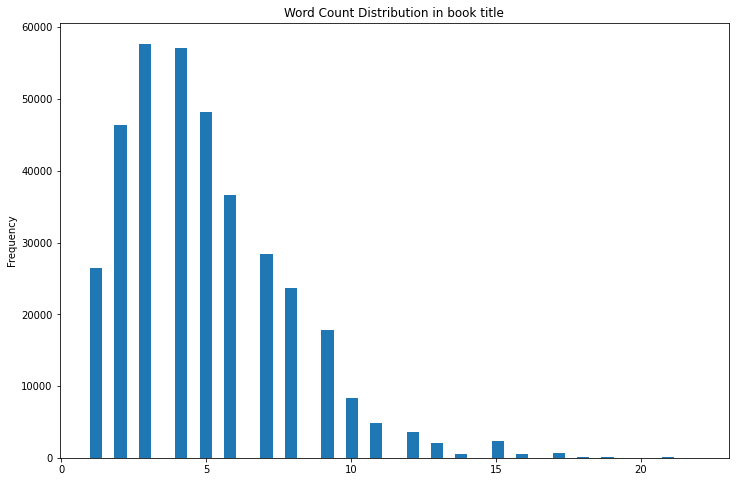

In [ ]:
df_combined['word_count'].plot(
    kind='hist',
    bins = 50,
    #linecolor='black',
    #xTitle='word count',
    #yTitle='count',
    figsize = (12,8),
    title='Word Count Distribution in book title')



In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
import re

# text processing (cleaning the title by removing special characters, numbers and stopwords)

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english')) # idea: use a list of languages for stopwords

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
    
df_combined['title_clean'] = df_combined['title'].apply(clean_text) # adding a column with the clean title to the dataframe

In [ ]:
df_combined.head()

,itemID,title,author,publisher,main topic,subtopics,sessionID,click,basket,order,session_count,mult_item_session,word_count,title_clean
0,21310,Princess Poppy: The Big Mix Up,Janey Louise Jones,Penguin Random House Children's UK,YFB,[5AH],0,1,0,0,1,NaN,6,princess poppy big mix
1,21310,Princess Poppy: The Big Mix Up,Janey Louise Jones,Penguin Random House Children's UK,YFB,[5AH],89272,1,0,0,1,NaN,6,princess poppy big mix
2,21310,Princess Poppy: The Big Mix Up,Janey Louise Jones,Penguin Random House Children's UK,YFB,[5AH],183856,1,0,0,1,NaN,6,princess poppy big mix
3,73018,Einfach zeichnen! Step by Step,Wiebke Krabbe,Schwager und Steinlein,AGZ,"[5AJ,AGZ,WFA,YBG,YBL,YNA,YPA]",1,1,0,0,1,NaN,5,einfach zeichnen step step
4,73018,Einfach zeichnen! Step by Step,Wiebke Krabbe,Schwager und Steinlein,AGZ,"[5AJ,AGZ,WFA,YBG,YBL,YNA,YPA]",771,1,0,0,3,771.0,5,einfach zeichnen step step


# (1) Vectorization of the feature containing text data

old attempt of cleaning the title column start

In [ ]:
# data pre-processing to remove stop words, punctuation, white space, and convert all words to lower case
l = [] # instantiating an empty list
r = Rake() # instantiating the RAKE (rapid automatic keyword extraction) object
for index, row in items_df.iterrows():
    r.extract_keywords_from_text(row['title'])
    key_words_dict_scores = r.get_word_degrees()
    l.append(list(key_words_dict_scores.keys()))
items_df['keywords'] = l # creating a keywords column in the items_df dataframe which contains a list of keywords

In [ ]:
items_df.head()

,itemID,title,author,publisher,main topic,subtopics,keywords
0,21310,Princess Poppy: The Big Mix Up,Janey Louise Jones,Penguin Random House Children's UK,YFB,[5AH],"[princess, poppy, big, mix]"
1,73018,Einfach zeichnen! Step by Step,Wiebke Krabbe,Schwager und Steinlein,AGZ,"[5AJ,AGZ,WFA,YBG,YBL,YNA,YPA]","[step, einfach, zeichnen]"
2,19194,Red Queen 1,Victoria Aveyard,Orion Publishing Group,YFH,"[5AP,FBA]","[red, queen, 1]"
3,40250,Meine Kindergarten-Freunde (Pirat),NaN,Ars Edition GmbH,YB,"[5AC,5AD,YBG,YBL,YF]","[meine, kindergarten, pirat, freunde]"
4,46107,Mein großes Schablonen-Buch - Wilde Tiere,Elizabeth Golding,Edition Michael Fischer,WFTM,"[WD,WFTM,YBG,YBL,YBLD,YBLN1]","[mein, großes, schablonen, buch, wilde, tiere]"


The recommender system can only read and compare a vector with another so we need to convert the text data into a vector using the CountVectorizer which counts the frequencies of each word

In [ ]:
#items_df["keywords"].shape

items_df["title"].shape


(78030,)

In [ ]:
# instantiating the CountVectorizer as an object
vectorizer = CountVectorizer()

In [ ]:
bag_of_words = vectorizer.fit_transform(items_df["title"])

print(bag_of_words) # (tuple) frequency of words

  (0, 30745)	1
  (0, 30413)	1
  (0, 38985)	1
  (0, 4741)	1
  (0, 25672)	1
  (0, 41085)	1
  (1, 11630)	1
  (1, 44408)	1
  (1, 37222)	2
  (1, 6247)	1
  (2, 31944)	1
  (2, 31324)	1
  (3, 24997)	1
  (3, 21236)	1
  (3, 14922)	1
  (3, 29990)	1
  (4, 24996)	1
  (4, 16986)	1
  (4, 33824)	1
  (4, 5978)	1
  (4, 43243)	1
  (4, 39248)	1
  (5, 13000)	1
  (5, 15792)	1
  (6, 24997)	1
  :	:
  (78023, 37412)	1
  (78023, 26505)	1
  (78023, 39975)	1
  (78023, 11969)	1
  (78023, 3665)	1
  (78024, 38985)	1
  (78024, 27995)	1
  (78024, 10767)	1
  (78024, 30582)	1
  (78025, 38389)	1
  (78025, 13301)	1
  (78025, 39348)	1
  (78026, 15430)	1
  (78026, 9677)	1
  (78027, 38985)	1
  (78027, 2164)	1
  (78027, 9690)	1
  (78027, 23174)	1
  (78027, 23470)	1
  (78028, 38985)	1
  (78028, 12986)	1
  (78028, 2844)	1
  (78029, 38985)	1
  (78029, 23052)	1
  (78029, 42277)	1


In [ ]:
# print the counts of repeated words
##print(vectorizer.vocabulary_)


<function dict.values>

old attempt to clean the title feature end

# (2) TF-IDF Transformation

TF-IDF: "term frequency - inverse document frequency
Text mining technique to compute a weight for each word (=term) representing its importance in the document

https://towardsdatascience.com/tf-idf-for-document-ranking-from-scratch-in-python-on-real-world-dataset-796d339a4089

**Parameters of the TfidfVectorizer function**:  

analyzer : str, {'word', 'char', 'char_wb'} 
    Whether the feature should be made of word or character n-grams.
    Option 'char_wb' creates character n-grams only from text inside 
   word boundaries; n-grams at the edges of words are padded with space.

ngram_range : tuple (min_n, max_n), default=(1, 1)
    The lower and upper boundary of the range of n-values for different
    n-grams to be extracted  




In [ ]:
##df_combined.set_index('title', inplace = True) # modifying the dataframe in place (not in a new object)

# Create a TF-IDF matrix (containing the TFIDF scores) of unigrams, bigrams, and trigrams for each book title
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english') 
tfidf_matrix = tf.fit_transform(df_combined['title_clean']) # transform the cleaned title feature 






TO DO: use multiple features and compute TFIDF scores for all of them
, e.g.:  
tfidf_matrix_3_features = tf.fit_transform(df_combined[["title_clean","publisher","author"]])

In [ ]:
# the TFIDF matrix contains the TFIDF score of each word
print(tfidf_matrix)

  (0, 66613)	0.37498706618772626
  (0, 67132)	0.37498706618772626
  (0, 9859)	0.37498706618772626
  (0, 66612)	0.37498706618772626
  (0, 67131)	0.3627469117723769
  (0, 59787)	0.3540623840068011
  (0, 9814)	0.2454669545374768
  (0, 66611)	0.271322082930969
  (0, 67075)	0.2161564446016081
  (1, 66613)	0.37498706618772626
  (1, 67132)	0.37498706618772626
  (1, 9859)	0.37498706618772626
  (1, 66612)	0.37498706618772626
  (1, 67131)	0.3627469117723769
  (1, 59787)	0.3540623840068011
  (1, 9814)	0.2454669545374768
  (1, 66611)	0.271322082930969
  (1, 67075)	0.2161564446016081
  (2, 66613)	0.37498706618772626
  (2, 67132)	0.37498706618772626
  (2, 9859)	0.37498706618772626
  (2, 66612)	0.37498706618772626
  (2, 67131)	0.3627469117723769
  (2, 59787)	0.3540623840068011
  (2, 9814)	0.2454669545374768
  :	:
  (365139, 35198)	0.26143793829041395
  (365139, 89679)	0.26143793829041395
  (365139, 5526)	0.26143793829041395
  (365139, 35197)	0.26143793829041395
  (365139, 89678)	0.26143793829041395
 

In [ ]:
tfidf_matrix.shape

(365143, 94745)

Cosine Similarity: The ultimate reason behind using cosine is that the value of cosine will increase as the angle between vectors with decreases, which signifies more similarity.

In [ ]:
# calcluating cosine similarities: (trying a subset of the data first to prevent the session from crashing)
cosine_similarities = cosine_similarity(tfidf_matrix[1:1500], tfidf_matrix[1:1500]) 

print(cosine_similarities)

[[1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]]


In [ ]:
cosine_similarities.shape

(1499, 1499)

In [ ]:
# creating a series of titles, so that the series index can match the row and column index of the similarity matrix
##indices = pd.Series(df_combined.index)
indices = pd.Series(df_combined["title"])

# (3) Making a recommendation

**Idea**: include main topics/subtopics in the recommendation function  
**final model number 1**: combine item-item recommender (title, author) with kNN clustering of transaction data

In [ ]:
#  defining the function that takes in a book title as an input and returns the top 5 recommended similar books
# This function will match the input book title with the corresponding index of the Similarity Matrix and extract the row of similarity values in descending order

def recommendations(title, cosine_sim = cosine_similarities):
    
    recommendations = [] # initializing the empty list of recommended books

    # gettin the index of the book that matches the title
    idx = indices[indices == title].index[0]

    ##if title not in idx:
    ##    raise KeyError("title is not in indices")

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # getting the indices of the 10 most similar movies
    top_5_indices = list(score_series.iloc[1:6].index)

    # populating the list with the titles of the best 10 matching movies
    for i in top_5_indices:
        recommendations.append(list(items_df["title"])[i])

    return recommendations


In [ ]:
# calling the recommendation function 
recommendations(title = "Red Queen 1", cosine_sim=cosine_similarities)

['Fae - The Sins of the Wyrde',
 'Fall; or, Dodge in Hell',
 'Gregs Filmtagebuch - Endlich berühmt!',
 'Meine Kindergarten-Freunde (Dinosaurier)',
 'Mein erstes Einhorn-Bastelbuch']

Backtest

In [ ]:
items_df.head()

,itemID,title,author,publisher,main topic,subtopics,keywords
0,21310,Princess Poppy: The Big Mix Up,Janey Louise Jones,Penguin Random House Children's UK,YFB,[5AH],"[princess, poppy, big, mix]"
1,73018,Einfach zeichnen! Step by Step,Wiebke Krabbe,Schwager und Steinlein,AGZ,"[5AJ,AGZ,WFA,YBG,YBL,YNA,YPA]","[step, einfach, zeichnen]"
2,19194,Red Queen 1,Victoria Aveyard,Orion Publishing Group,YFH,"[5AP,FBA]","[red, queen, 1]"
3,40250,Meine Kindergarten-Freunde (Pirat),NaN,Ars Edition GmbH,YB,"[5AC,5AD,YBG,YBL,YF]","[meine, kindergarten, pirat, freunde]"
4,46107,Mein großes Schablonen-Buch - Wilde Tiere,Elizabeth Golding,Edition Michael Fischer,WFTM,"[WD,WFTM,YBG,YBL,YBLD,YBLN1]","[mein, großes, schablonen, buch, wilde, tiere]"


In [ ]:
# double check: printing the keywords of the book with the title "Astrid Lindgren"
items_df["keywords"].loc[items_df["title"]=="Astrid Lindgren"]

75    [astrid, lindgren]
Name: keywords, dtype: object

# K-NN based item-item recommendation

Idea: filtering out sessions with more than 1 item
```
# Create column containing the number of items per session
df_combined['session_count'] = df_combined.groupby('sessionID')['itemID'].transform('count')

# creating a column with session ids for which there is more than 1 item per session
##df_combined["mult_item_session"] = df_combined[ifelse(df_combined["session_count"] > 1]["sessionID"]


df_combined[""]df_combined["mult_item_session"].dropna()


# This is formatted as code
```




https://github.com/topspinj/recommender-tutorial/blob/master/part-1-item-item-recommender.ipynb



The create_X() function outputs a sparse matrix X with four mapper dictionaries:

    user_mapper: maps user id to user index
    movie_mapper: maps movie id to movie index
    user_inv_mapper: maps user index to user id
    movie_inv_mapper: maps movie index to movie id

We need these dictionaries because they map which row and column of the utility matrix corresponds to which user ID and movie ID, respectively.

The X (user-item) matrix is a scipy.sparse.csr_matrix which stores the data sparsely.


In [ ]:
# Idea:
# movie id = itemID
# user id  = sessionID
# use click or order as implicit feedback (equivalent to ratings in a CF recommender)

from scipy.sparse import csr_matrix

def create_X(df):
    """
    Generates a sparse matrix from ratings dataframe.
    
    Args:
        df: pandas dataframe
    
    Returns:
        X: sparse matrix
        user_mapper: dict that maps user id's to user indices
        user_inv_mapper: dict that maps user indices to user id's
        movie_mapper: dict that maps movie id's to movie indices
        movie_inv_mapper: dict that maps movie indices to movie id's
    """
    N = df_combined['sessionID'].nunique()
    M = df_combined['itemID'].nunique()

    user_mapper = dict(zip(np.unique(df_combined['sessionID']), list(range(N))))
    book_mapper = dict(zip(np.unique(df_combined['itemID']), list(range(M))))
    
    user_inv_mapper = dict(zip(list(range(N)), np.unique(df_combined['sessionID'])))
    book_inv_mapper = dict(zip(list(range(M)), np.unique(df_combined['itemID'])))
    
    user_index = [user_mapper[i] for i in df_combined['sessionID']]
    book_index = [book_mapper[i] for i in df_combined['itemID']]

    X = csr_matrix((df_combined["click"], (book_index, user_index)), shape=(M, N)) #data to be used for the KNN model
    
    return X, user_mapper, book_mapper, user_inv_mapper, book_inv_mapper

In [ ]:
items_df.head()

,itemID,title,author,publisher,main topic,subtopics
0,21310,Princess Poppy: The Big Mix Up,Janey Louise Jones,Penguin Random House Children's UK,YFB,[5AH]
1,73018,Einfach zeichnen! Step by Step,Wiebke Krabbe,Schwager und Steinlein,AGZ,"[5AJ,AGZ,WFA,YBG,YBL,YNA,YPA]"
2,19194,Red Queen 1,Victoria Aveyard,Orion Publishing Group,YFH,"[5AP,FBA]"
3,40250,Meine Kindergarten-Freunde (Pirat),NaN,Ars Edition GmbH,YB,"[5AC,5AD,YBG,YBL,YF]"
4,46107,Mein großes Schablonen-Buch - Wilde Tiere,Elizabeth Golding,Edition Michael Fischer,WFTM,"[WD,WFTM,YBG,YBL,YBLD,YBLN1]"


In [ ]:
X, user_mapper, book_mapper, user_inv_mapper, book_inv_mapper = create_X(df_combined)

In [ ]:
print(X)

  (0, 7513)	1
  (0, 207411)	1
  (1, 1767)	1
  (1, 51239)	5
  (1, 56349)	1
  (1, 104271)	6
  (1, 126197)	1
  (1, 134470)	1
  (1, 142703)	1
  (1, 160706)	1
  (2, 30167)	1
  (2, 48732)	1
  (2, 71006)	1
  (2, 111982)	1
  (2, 176435)	1
  (2, 179604)	4
  (2, 203482)	1
  (2, 207065)	1
  (3, 22430)	1
  (3, 35159)	1
  (3, 102727)	1
  (4, 65632)	1
  (4, 79253)	1
  (4, 104981)	1
  (4, 111387)	1
  :	:
  (24905, 84929)	1
  (24905, 169227)	1
  (24905, 261402)	1
  (24905, 269352)	1
  (24906, 48713)	1
  (24907, 18599)	0
  (24907, 46178)	1
  (24907, 67923)	2
  (24907, 123127)	1
  (24907, 129521)	2
  (24907, 139518)	1
  (24907, 139934)	1
  (24907, 151267)	1
  (24907, 162298)	1
  (24907, 164637)	1
  (24907, 192226)	1
  (24907, 196006)	1
  (24907, 209951)	2
  (24908, 58069)	1
  (24908, 137244)	1
  (24908, 142784)	1
  (24908, 166946)	1
  (24908, 210817)	0
  (24908, 251444)	1
  (24908, 266675)	1


In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
# k-nearest neighbors using cosine as a similarity measure


book_id = df_combined["itemID"]


def find_similar_books(movie_id, X, k, metric='cosine', show_distance=False):
    """
    Finds k-nearest neighbours for a given movie id.
    
    Args:
        movie_id: id of the movie of interest
        X: user-item utility matrix
        k: number of similar movies to retrieve
        metric: distance metric for kNN calculations
    
    Returns:
        list of k similar movie ID's
    """
    neighbour_ids = []
    
    book_ind = book_mapper[book_id]
    book_vec = X[book_ind]
    k+=1
    kNN = NearestNeighbors(n_neighbors=k, algorithm="brute", metric=metric, n_jobs=-1)
    kNN.fit(X)
    if isinstance(book_vec, (np.ndarray)):
        book_vec = book_vec.reshape(1,-1)
    neighbour = kNN.kneighbors(book_vec, return_distance=show_distance)
    for i in range(0,k):
        n = neighbour.item(i)
        neighbour_ids.append(book_inv_mapper[n])
    neighbour_ids.pop(0)
    return neighbour_ids

In [ ]:
book_titles = dict(zip(df_combined['itemID'], df_combined["title"]))

book_id = 73018

similar_ids = find_similar_books(book_id, X, k=5) # use k-NN to get the top 5 (k=5) similar items
book_title = book_titles[book_id]

print(f"Recommendations for {book_title}:")
for i in similar_ids:
    print(book_titles[i])



Recommendations for Einfach zeichnen! Step by Step:
Chibi zeichnen lernen
Zeichnen mit Jill
Zeichnen lernen: Linien Formen Buchstaben: Kinder Aktivitätenheft: Ab 3 Jahren: Ein Aktivitätenheft 
Und plötzlich war Frau Honig da
Zeichnen mit Schablonen - Pferde


In [ ]:
movie_id

1

In [ ]:
df_combined[df_combined["itemID"] == 1]

,itemID,title,author,publisher,main topic,subtopics,sessionID,click,basket,order
260801,1,Kinderklassiker-Soundbuch - Don Quichotte,Miguel de Cervantes Saavedra,Yo Yo Books,YBC,[],7743,1,0,0
260802,1,Kinderklassiker-Soundbuch - Don Quichotte,Miguel de Cervantes Saavedra,Yo Yo Books,YBC,[],212997,1,0,0


# Word Embedding Recommender

https://www.kdnuggets.com/2020/08/content-based-recommendation-system-word-embeddings.html

Word embedding features create a dense, low dimensional feature whereas TF-IDF creates a sparse, high dimensional feature. It also captures the semantic meaning very well.

One of the significant breakthroughs is word2vec embeddings which were introduced in 2013 by Google. Using embeddings word2vec outperforms TF-IDF in many ways. Another turning point in NLP was the Transformer network introduced in 2017. Followed by multiple research, BERT (Bidirectional Encoder Representations from Transformers) and many others were introduced which are considered state of art algorithms in NLP.

Bidirectional Encoder Representations from Transformers (BERT) is a Transformer-based machine learning technique for natural language processing (NLP) pre-training developed by Google. BERT was created and published in 2018 by Jacob Devlin and his colleagues from Google

Differences between Word2Vec and BERT:  
https://medium.com/swlh/differences-between-word2vec-and-bert-c08a3326b5d1

- **Context:** Word2Vec creates one vector for each word which contains different meanings of each word (context independent) vs BERT creates multiple vectors for the same word based on the context in which the word is used (context dependent)

- **Word Ordering:** Word2Vec embeddings do not take into account the word position whereas BERT takes into account a word's position (index) before calculating an embedding

- **Embedding Input/Output:** Word2Vec embeddings can be used from a pre-trained model (model is not required but only the embeddings); the model takes a single word as an input and outputs a vector whereas the BERT model takes a sentence as an input to account for the context provided by the surrounding words and outputs a fixed-length vector for the entire input sentence

- **Out of Vocabulary:** Word2Vec learns embeddings at the word level (e.g. corpus of 1 mio unique words - 1 mio word embeddings; Word2Vec can't account for words outside of the vocabulary space whereas BERT is trained on the "subword" level (between character and word level) and provides support for out of vocabulary words

In [6]:
# Importing necessary libraries
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
import re
import string
import random
from PIL import Image
import requests
from io import BytesIO
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import Word2Vec
from gensim.models.phrases import Phrases, Phraser
from gensim.models import KeyedVectors

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
# cleaning the titles

# Utitlity functions for removing ASCII characters, converting lower case, removing stop words, html and punctuation from description

def _removeNonAscii(s):
    return "".join(i for i in s if  ord(i)<128)

def make_lower_case(text):
    return text.lower()

def remove_stop_words(text):
    text = text.split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text

def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text

items_df['title_cleaned'] = items_df['title'].apply(_removeNonAscii) # creating a new cleaned title column

items_df['title_cleaned'] = items_df.title_cleaned.apply(func = make_lower_case)
items_df['title_cleaned'] = items_df.title_cleaned.apply(func = remove_stop_words)
items_df['title_cleaned'] = items_df.title_cleaned.apply(func=remove_punctuation)
items_df['title_cleaned'] = items_df.title_cleaned.apply(func=remove_html)

In [8]:
# check
items_df["title_cleaned"].head()

0                    princess poppy big mix
1                einfach zeichnen step step
2                               red queen 1
3          meine kindergarten freunde pirat
4    mein groes schablonen buch wilde tiere
Name: title_cleaned, dtype: object

In [9]:
# splitting the title into single words and storing them in a list
# in linguistics and NLP "corpus" refers to a collection of texts

corpus = []
for words in items_df['title_cleaned']:
    corpus.append(words.split())

In [10]:
len(corpus) # length of the corpus list

78030

Google pretrained Word2Vec model

API of Word2Vec:  
https://radimrehurek.com/gensim/models/word2vec.html

In [14]:
# Downloading the Google pretrained Word2Vec Model
!wget -P /root/input/ -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

EMBEDDING_FILE = '/root/input/GoogleNews-vectors-negative300.bin.gz'
google_word2vec = KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)

# Training our corpus using the Google Pretrained Model

google_model = Word2Vec(size = 300, window=5, min_count = 2, workers = -1)
google_model.build_vocab(corpus)

#model.intersect_word2vec_format('./word2vec/GoogleNews-vectors-negative300.bin', lockf=1.0, binary=True)

google_model.intersect_word2vec_format(EMBEDDING_FILE, lockf=1.0, binary=True)

google_model.train(corpus, total_examples=google_model.corpus_count, epochs = 5)

KeyboardInterrupt: ignored

In [12]:
# Creating a function called vectors for generating average Word2Vec embeddings 
# and storing them as a list called ‘word_embeddings’

# Generate the average word2vec for the each book description

def vectors(x):
    
    # Creating a list for storing the vectors (description into vectors)
    global word_embeddings
    word_embeddings = []

    # Reading the each book description 
    for line in items_df['title_cleaned']:
        avgword2vec = None
        count = 0
        for word in line.split():
            if word in google_model.wv.vocab:
                count += 1
                if avgword2vec is None:
                    avgword2vec = google_model[word]
                else:
                    avgword2vec = avgword2vec + google_model[word]
                
        if avgword2vec is not None:
            avgword2vec = avgword2vec / count
        
            word_embeddings.append(avgword2vec)

In [13]:
# calling the vectors function to generate word embeddings
vectors(corpus)

NameError: ignored

In [23]:
array_embeddings = word_embeddings

len(word_embeddings)

73939

In [30]:
word_embeddings[1:10]

[array([-0.07302269,  0.0518485 ,  0.04675459, -0.08937353, -0.14229386,
        -0.00155867,  0.05519833, -0.1053351 ,  0.01847689,  0.10212863,
         0.07639129, -0.05789734,  0.07012239, -0.02491805, -0.11151642,
         0.05500191,  0.11968205, -0.01523484, -0.0030975 , -0.07105806,
         0.08532815,  0.0623019 ,  0.1199355 ,  0.04066737,  0.03480523,
         0.05483752, -0.00882809,  0.01964537, -0.03629423,  0.00998082,
        -0.05076137,  0.04623223,  0.04034686, -0.01750526, -0.07446565,
        -0.0522985 ,  0.06368329,  0.06311066,  0.04394434,  0.03235407,
        -0.09494753, -0.01070049,  0.03522715, -0.0103653 , -0.06791006,
        -0.19748133, -0.17508474, -0.0173971 , -0.16818039,  0.06328861,
        -0.07502972,  0.13647124,  0.05740081, -0.11516082,  0.08651444,
         0.07938945, -0.03584358, -0.07592809, -0.02543282,  0.01247443,
        -0.1492597 ,  0.02878238, -0.042869  ,  0.06736728,  0.0605721 ,
        -0.08973602,  0.0332939 ,  0.04956881, -0.0

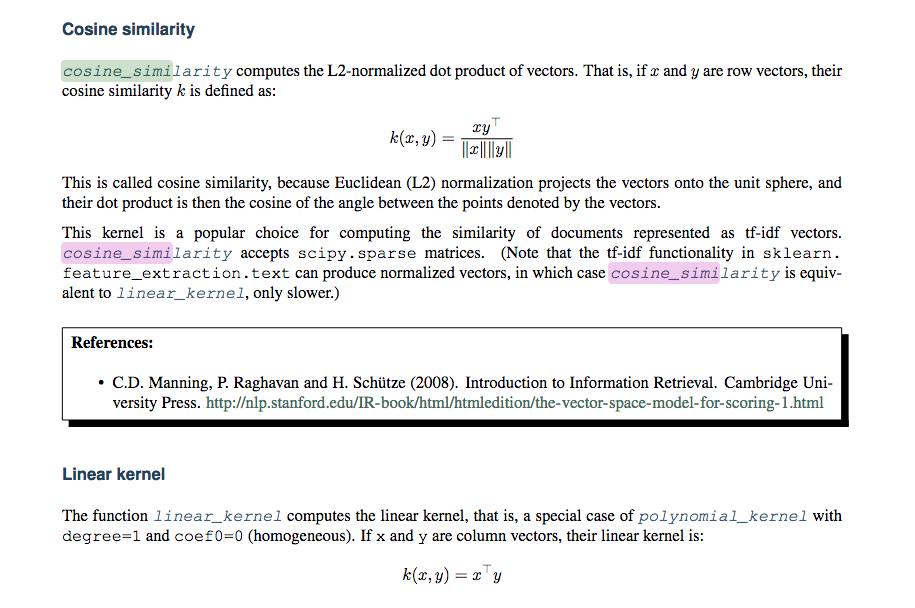

TO DO: Splitting the matrix into smaller chunks to get the cosine_similarity function to run

In [31]:
# Change chunk_size to control resource consumption and speed
# Higher chunk_size means more memory/RAM needed but also faster 

your_matrix = np.asarray(word_embeddings)

chunk_size = 500 
matrix_len = your_matrix.shape[0] # Not sparse numpy.ndarray

def similarity_cosine_by_chunk(start, end):
    if end > matrix_len:
        end = matrix_len
    return cosine_similarity(X=your_matrix[start:end], Y=your_matrix) # scikit-learn function

for chunk_start in range(0, matrix_len, chunk_size):
    cosine_similarity_chunk = similarity_cosine_by_chunk(chunk_start, chunk_start+chunk_size)
    # Handle cosine_similarity_chunk  ( Write it to file_timestamp and close the file )
    # Do not open the same file again or you may end up with out of memory after few chunks 

In [32]:
# total matrix of word embeddings
your_matrix.shape

(73939, 300)

In [33]:
cosine_similarity_chunk.shape

(439, 73939)

Attempt to store the results and loop through the entire matrix

In [ ]:
# Change chunk_size to control resource consumption and speed
# Higher chunk_size means more memory/RAM needed but also faster 

your_matrix = np.asarray(word_embeddings)

chunk_size = 50 
matrix_len = your_matrix.shape[0] # Not sparse numpy.ndarray (number of rows)

def similarity_cosine_by_chunk(start, end):
    if end > matrix_len:
        end = matrix_len
    return cosine_similarity(X=your_matrix[start:end], Y=your_matrix) # scikit-learn function

# storing the cosine values of the chunks already run in a new list
cosine_chunks = []    # empty list

for chunk_start in range(0, matrix_len, chunk_size):
    cosine_chunks.append(similarity_cosine_by_chunk(chunk_start, chunk_start+chunk_size))
    # Handle cosine_similarity_chunk  ( Write it to file_timestamp and close the file )
    # Do not open the same file again or you may end up with out of memory after few chunks 


##cosine_chunks.append(similarity_cosine_by_chunk(start=1, end =500))
##cosine_chunks.append(similarity_cosine_by_chunk(start=501, end =1000))

In [ ]:
cosine_chunks

In [18]:
# Recommending the Top 5 similar books using Average Word2Vec

def recommendations(title):
    
    # Calling the function vectors

    vectors(items_df)
    
    # finding the cosine similarity for the vectors (cosine_similarity tries to run the sparse dot product)

    cosine_similarities = cosine_similarity(array_embeddings, array_embeddings, dense_output=False) # dense_output = False added 

    # taking the title and book image link and store in new data frame called books
    ##books = items_df[['title_cleaned', 'image_link']]
    books = items_df['title_cleaned']
    # Reversing the mapping of the index
    indices = pd.Series(df.index, index = items_df['title_cleaned']).drop_duplicates()
         
    idx = indices[title]
    sim_scores = list(enumerate(cosine_similarities[idx]))
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True) # sorting by descending cosine similarity
    sim_scores = sim_scores[1:6]
    book_indices = [i[0] for i in sim_scores]
    recommend = books.iloc[book_indices]
    for index, row in recommend.iterrows():

        response = requests.get(row['image_link'])
        img = Image.open(BytesIO(response.content))
        plt.figure()
        plt.imshow(img)
        plt.title(row['title'])

In [ ]:
# getting recommendations for a specific book
recommendations(title ="Einfach zeichnen! Step by Step:")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


# Recommender system based on implicit feedback

https://github.com/topspinj/recommender-tutorial/blob/master/part-3-implicit-feedback-recommender.ipynb

In [ ]:
# Idea:
# movie id = itemID
# user id  = sessionID
# use click or order as implicit feedback (equivalent to ratings in a CF recommender)

from scipy.sparse import csr_matrix

def create_X(df):
    """
    Generates a sparse matrix from ratings dataframe.
    
    Args:
        df: pandas dataframe
    
    Returns:
        X: sparse matrix
        user_mapper: dict that maps user id's to user indices
        user_inv_mapper: dict that maps user indices to user id's
        movie_mapper: dict that maps movie id's to movie indices
        movie_inv_mapper: dict that maps movie indices to movie id's
    """
    N = df_combined['sessionID'].nunique()
    M = df_combined['itemID'].nunique()

    user_mapper = dict(zip(np.unique(df_combined['sessionID']), list(range(N))))
    movie_mapper = dict(zip(np.unique(df_combined['itemID']), list(range(M))))
    
    user_inv_mapper = dict(zip(list(range(N)), np.unique(df_combined['sessionID'])))
    movie_inv_mapper = dict(zip(list(range(M)), np.unique(df_combined['itemID'])))
    
    user_index = [user_mapper[i] for i in df_combined['sessionID']]
    movie_index = [movie_mapper[i] for i in df_combined['itemID']]

    X = csr_matrix((df_combined["click"], (movie_index, user_index)), shape=(M, N))
    
    return X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper

In [ ]:
X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper = create_X(df_combined)


Creating Movie Title Mappers¶

We need to interpret a movie title from its index in the user-item matrix and vice versa. Let's create 2 helper functions that make this interpretation easy:

    get_movie_index() - converts a movie title to movie index
        Note that this function uses fuzzywuzzy's string matching to get the approximate movie title match based on the string that gets passed in. This means that you don't need to know the exact spelling and formatting of the title to get the corresponding movie index.
    get_movie_title() - converts a movie index to movie title



In [ ]:
pip install fuzzywuzzy

In [ ]:
# idea: replace movies["title"] with df_combined["title"] and movies["movieID"] with df_combined["itemID"]

from fuzzywuzzy import process

def movie_finder(title):
    all_titles = df_combined['title'].tolist()
    closest_match = process.extractOne(title,all_titles)
    return closest_match[0]

movie_title_mapper = dict(zip(df_combined['title'], df_combined['itemID']))
movie_title_inv_mapper = dict(zip(df_combined['itemID'], df_combined['title']))

def get_movie_index(title):
    fuzzy_title = movie_finder(title)
    movie_id = movie_title_mapper[fuzzy_title]
    movie_idx = movie_mapper[movie_id]
    return movie_idx

def get_movie_title(movie_idx): 
    movie_id = movie_inv_mapper[movie_idx]
    title = movie_title_inv_mapper[movie_id]
    return title


In [ ]:
# test
get_movie_index('Red Queen 1')

614

In [ ]:
# test
get_movie_title(19194)

'Harry Potter and the Cursed Child: Journey: Behind the Scenes of the Award-Winning Stage Production'

# Matrix factorization using alternating least squares

We've transformed and prepared our data so that we can start creating our recommender model.

The implicit package is built around a linear algebra technique called matrix factorization), which can help us discover latent features underlying the interactions between users and movies. These latent features give a more compact representation of user tastes and item descriptions. Matrix factorization is particularly useful for very sparse data and can enhance the quality of recommendations. The algorithm works by factorizing the original user-item matrix into two factor matrices:

    user-factor matrix (n_users, k)
    item-factor matrix (k, n_items)

We are reducing the dimensions of our original matrix into "taste" dimensions. We cannot interpret what each latent feature $k$ represents. However, we could imagine that one latent feature may represent users who like romantic comedies from the 1990s, while another latent feature may represent movies which are independent foreign language films.
$$X_{mn} \approx P_{mk} \times Q_{nk}^T = \hat{X}$$

In traditional matrix factorization, such as SVD, we would attempt to solve the factorization at once which can be very computationally expensive. As a more practical alternative, we can use a technique called Alternating Least Squares (ALS) instead. With ALS, we solve for one factor matrix at a time:

    Step 1: hold user-factor matrix fixed and solve for the item-factor matrix
    Step 2: hold item-factor matrix fixed and solve for the user-item matrix

We alternate between Step 1 and 2 above, until the dot product of the item-factor matrix and user-item matrix is approximately equal to the original X (user-item) matrix. This approach is less computationally expensive and can be run in parallel.

The implicit package implements matrix factorization using Alternating Least Squares (see docs here). Let's initiate the model using the AlternatingLeastSquares class.

In [ ]:
pip install implicit

     |████████████████████████████████| 1.1MB 17.7MB/s 
  Created wheel for implicit: filename=implicit-0.4.4-cp37-cp37m-linux_x86_64.whl size=3406430 sha256=f28fa8edd2478737c4a192bbb17169f3511c862972164afdc4b3ecd55a2422a8
  Stored in directory: /root/.cache/pip/wheels/bf/d4/ec/fd4f622fcbefb7521f149905295b2c26adecb23af38aa28217
Successfully built implicit


ALS recommender is a matrix factorization algorithm that uses Alternating Least Squares with Weighted-Lamda-Regularization (ALS-WR). It factors the user to item matrix A into the user-to-feature matrix U and the item-to-feature matrix M: It runs the ALS algorithm in a parallel fashion

In [ ]:
import implicit

model = implicit.als.AlternatingLeastSquares(factors=64)



This model comes with a couple of hyperparameters that can be tuned to generate optimal results:

    factors ($k$): number of latent factors,
    regularization ($\lambda$): prevents the model from overfitting during training

In this tutorial, we'll set $k = 50$ and $\lambda = 0.01$ (the default). In a real-world scenario, I highly recommend tuning these hyperparameters before generating recommendations to generate optimal results.

The next step is to fit our model with our user-item matrix.


In [ ]:
model.fit(X)



Now, let's test out the model's recommendations. We can use the model's similar_items() method which returns the most relevant movies of a given movie. We can use our helpful get_movie_index() function to get the movie index of the movie that we're interested in.


In [ ]:
movie_of_interest = 'Red Queen 1'

movie_index = get_movie_index(movie_of_interest)
related = model.similar_items(movie_index)
related

[(614, 1.0000001),
 (6004, 0.9425057),
 (5250, 0.91434276),
 (10416, 0.89084107),
 (18611, 0.8875659),
 (13414, 0.88539433),
 (12986, 0.8837407),
 (2908, 0.8756041),
 (11683, 0.87245053),
 (13302, 0.855826)]

The output of similar_items() is not user-friendly. We'll need to use our get_movie_title() function to interpret what our results are.

In [ ]:
print(f"Because you watched {movie_finder(movie_of_interest)}...")
for r in related:
    recommended_title = get_movie_title(r[0])
    if recommended_title != movie_finder(movie_of_interest):     # != : "is not equal to"; print titles not equal to the title supplied to the model
        print(recommended_title)

Because you watched Red Queen 1...
Truly Devious
The Beautiful
American Royals 2: Majesty
Lovely War
Looking for Alaska
Looking for Alaska
These Witches Don't Burn
I Have Lost My Way


last execution took 72 min